# To churn or not to churn  
###Author: E. Thompson-Becker 


## Initial Analysis


Load libraries

In [1]:
 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt

Load Dataset from the csv file using Pandas 


In [2]:
data = pd.read_csv("churn.csv")

In [3]:
#rename attribute Int'l Plan to Intl Plan
data.rename(columns={"Int'l Plan":"Intl Plan"}, inplace=True)

#check data 
data.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Intl Plan       3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [5]:
#describe 
data.describe().T
#only includes numeric data types

,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [6]:
#find the counts for each categorical value 
state_count = data['State'].value_counts()
intl_count = data['Intl Plan'].value_counts()
vmail_count = data['VMail Plan'].value_counts()
churn_count = data['Churn?'].value_counts()

In [18]:
print(intl_count)

#international plan by churn
pd.crosstab(data['Intl Plan'],data['Churn?'],margins=True)

no     3010
yes     323
Name: Intl Plan, dtype: int64


Churn?,False.,True.,All
Intl Plan,,,
no,2664,346,3010
yes,186,137,323
All,2850,483,3333


In [20]:
print(vmail_count)
pd.crosstab(data['VMail Plan'],data['Churn?'],margins=True)

no     2411
yes     922
Name: VMail Plan, dtype: int64


Churn?,False.,True.,All
VMail Plan,,,
no,2008,403,2411
yes,842,80,922
All,2850,483,3333


In [21]:
print(churn_count)

False.    2850
True.      483
Name: Churn?, dtype: int64


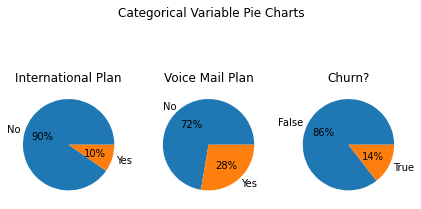

In [10]:
#pie charts for categorical variables
plt.subplot(1,3,1)
plt.pie(intl_count, labels = ['No','Yes'],autopct='%.0f%%')
plt.title('International Plan')
plt.subplot(1,3,2)
plt.pie(vmail_count, labels = ['No','Yes'],autopct='%.0f%%')
plt.title('Voice Mail Plan')
plt.subplot(1,3,3)
plt.pie(churn_count, labels = ['False','True'],autopct='%.0f%%')
plt.title('Churn?')

plt.tight_layout(h_pad=.1)
plt.suptitle('Categorical Variable Pie Charts')
plt.show()

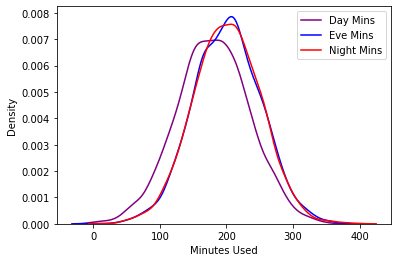

In [11]:
#compare minutes used 
sns.kdeplot(data['Day Mins'], color='purple')
sns.kdeplot(data['Eve Mins'], color = 'blue')
sns.kdeplot(data['Night Mins'], color='red')

plt.xlabel('Minutes Used')
plt.legend(['Day Mins','Eve Mins', 'Night Mins'])

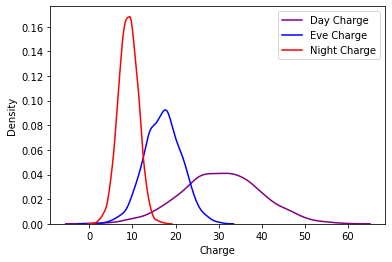

In [12]:
#compare charges from parts of day
sns.kdeplot(data['Day Charge'], color='purple')
sns.kdeplot(data['Eve Charge'], color = 'blue')
sns.kdeplot(data['Night Charge'], color='red')

plt.xlabel('Charge')
plt.legend(['Day Charge','Eve Charge', 'Night Charge'])

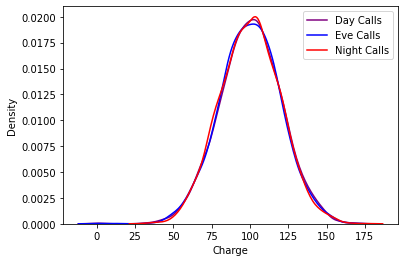

In [13]:
#compare number of calls by parts of day
sns.kdeplot(data['Day Calls'], color='purple')
sns.kdeplot(data['Eve Calls'], color = 'blue')
sns.kdeplot(data['Night Calls'], color='red')

plt.xlabel('Charge')
plt.legend(['Day Calls','Eve Calls', 'Night Calls'])

- more minutes are used in the evening and night than in the day
- the day charges are highest, and the night charges are the lowest
- the number of calls for each category are averaged at 20  

From these graphs we can  infer that altough the number of calls are the same for each category, calls are longer at night due to their low cost. 

In [27]:
#number of service calls broken down by churn
pd.crosstab(data['CustServ Calls'], data['Churn?'],margins=True)


Churn?,False.,True.,All
CustServ Calls,,,
0,605,92,697
1,1059,122,1181
2,672,87,759
3,385,44,429
4,90,76,166
5,26,40,66
6,8,14,22
7,4,5,9
8,1,1,2


## Feature Selection
Use python weka attribute selection to select important attributes to create a better classifier. Selected attributes are determined here to make it easier to implement in the classification analyses. 


Load weka's python package

In [28]:
#install weka's python package
! pip install python-weka-wrapper3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.4 MB 25.6 MB/s 
     |████████████████████████████████| 1.3 MB 70.2 MB/s 
  Created wheel for python-weka-wrapper3: filename=python_weka_wrapper3-0.2.10-py3-none-any.whl size=12993854 sha256=53854fcf85d86764f689868ac950072a8654b9186888bfbd9b8ff292809d6ae7
  Stored in directory: /root/.cache/pip/wheels/a4/e9/93/c8dc5119f22ea38aa2bfbd02c33f4b2a6c6293f1a86283fd91
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp37-cp37m-linux_x86_64.whl size=1628159 sha256=1ea1f5030ff5712a7b8df1b1a67e79b553fa93ae66811afe90e23c977e5d6feb
  Stored in directory: /root/.cache/pip/wheels/63/7e/91/01b1bd8d29b4323834feb5cfec49b857fb212e6efc74ce103c
Successfully built python-weka-wrapper3 python-javabridge


In [29]:
#set up java in python environment
import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"

import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.7/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.7/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.7/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.7/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.7/dist-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [30]:
#import arff file
from google.colab import files
uploaded = files.upload()

Saving churn.arff to churn.arff


In [31]:
#import packages
from weka.core.converters import Loader
from weka.core.classes import Random
from weka.classifiers import Classifier, Evaluation
from weka.filters import Filter

#load data
loader = Loader(classname="weka.core.converters.ArffLoader")
data_file = "churn.arff"
data = loader.load_file(data_file)

From initial inspection the customers state, phone number and area code do not affect the customers choice to leave the company or not. Therefore, these variables are immediately removed from the analysis. It is important that these attributes be removed before the selection filter so they do not create false bias. 

In [37]:
from weka.filters import Filter
filtered_data=data.subset(col_range='2,5-21')

Use feature selection to find the best attributes. Excluding the customers personal indentification information.

In [39]:
from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
search = ASSearch(classname="weka.attributeSelection.BestFirst", options=["-D", "1", "-N", "5"])
evaluator = ASEvaluation(classname="weka.attributeSelection.CfsSubsetEval", options=["-P", "1", "-E", "1"])
attsel = AttributeSelection()
attsel.search(search)
attsel.evaluator(evaluator)
attsel.select_attributes(filtered_data)

print("# attributes: " + str(attsel.number_attributes_selected))
print("attributes: " + str(attsel.selected_attributes))
print("result string:\n" + attsel.results_string)

# attributes: 7
attributes: [ 1  2  4  7 13 14 16 17]
result string:


=== Attribute Selection on all input data ===

Search Method:
	Best first.
	Start set: no attributes
	Search direction: forward
	Stale search after 5 node expansions
	Total number of subsets evaluated: 115
	Merit of best subset found:    0.137

Attribute Subset Evaluator (supervised, Class (nominal): 18 Churn):
	CFS Subset Evaluator
	Including locally predictive attributes

Selected attributes: 2,3,5,8,14,15,17 : 7
                     Inter Plan
                     VoiceMail Plan
                     Total Day Min
                     Total Evening Min
                     Total Int Min
                     Total Int Calls
                     No of Calls Customer Service



Use these attributes to preform a second analysis with selected attributes, from original data these attributes are numbers: 4,5,7,10,16,17,19 and 20. 

In [49]:
#create new dataset with selected attributes
data2 = filtered_data.subset(col_range='2,3,5,8,14,15,17,18')

In [48]:
#data2  #use this to check that the correct attributes were selected